In [5]:
import tweepy
import csv
import pandas as pd
import numpy as np
import unicodedata
import datetime as datetime
import re
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns

In [234]:
def encode(text):
        return unicodedata.normalize('NFKD', text).encode('ascii','ignore').decode('utf-8')
        
def tweet_grabber(query):
    
    consumer_key = '14RdwJwcED1RkanxC5QdLLgeF'
    consumer_secret = 'lY2NG8dk082YcG16TEWndihyn7Gmh7mCOmYsFaTlTUakkZ9cva'
    access_token = '2920967563-NE93uzMVjJaxrsYSdzpJAyFPTlCdRKLSo5in92A'
    access_token_secret = 'CeM8uEWVa8J9Iq0esKaoNab51Vhy9KUSmj1QFXz6iaQ5G'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)

    csvFile = open('NewTweets.csv', 'a')
    csvWriter = csv.writer(csvFile)
    
    csvWriter.writerow(["tweet_id", "search_keyword", "username", "screen_name", 
                        "location", "creation_date", "creation_time", "text", 
                        "favorite_count", "retweet_count", "source", "hashtags"])
    
    for i in range(len(query)):
        for tweet in tweepy.Cursor(api.search,q= query[i],count=100, lang="en",
                                   since=(datetime.datetime.now() - datetime.timedelta(days=7)).date(), 
                                   tweet_mode='extended', include_entities = True).items():
            
            if not(hasattr(tweet, 'retweeted_status')):
                csvWriter.writerow([str(tweet.id), query[i][1:], tweet.user.name, tweet.user.screen_name, 
                                    encode(tweet.user.location), tweet.created_at.date(), tweet.created_at.time(), 
                                    encode(tweet.full_text), tweet.favorite_count, tweet.retweet_count, tweet.source, 
                                    ', '.join(map(lambda x : x['text'], tweet.entities['hashtags']))])
    
    csvFile.close()
    
#possibly include retweets that aren't included in this week
#export to dataframe directly so we don't have to remove emoji's

In [238]:
#tweet_grabber("#UnitedAirlines OR #AmericanAirlines OR #DeltaAirlines OR #VirginAmerica OR #SouthwestAirlines OR #JetBlue")

tweet_grabber(['#UnitedAirlines', '#AmericanAirlines', '#DeltaAirlines', '#VirginAmerica', '#SouthwestAirlines', '#JetBlue'])



In [73]:
Tweets= pd.read_csv("NewTweets.csv")
Tweets.head()

,tweet_id,search_keyword,username,screen_name,location,creation_date,creation_time,text,favorite_count,retweet_count,source,hashtags
0,1101527869317173248,UnitedAirlines,Airfare Deals #BTD,airfaredealsbtd,Flying,2019-03-01,17:01:24,$344 &amp; up - Burbank to Seattle (Rountrip) ...,0,0,Hootsuite Inc.,"bur, sea, unitedairlines"
1,1101524112516792320,UnitedAirlines,Maurie Wilson,mjweye,The Woodlands,2019-03-01,16:46:28,@united #UnitedAirlines 6+ hour delay in St Lo...,0,0,Twitter for iPhone,UnitedAirlines
2,1101515490361573376,UnitedAirlines,Leslie Bursack,lbjinstl,St. Louis,2019-03-01,16:12:12,Hey @united maybe you should consider keeping ...,0,0,Twitter for iPhone,unitedairlines
3,1101508139495636992,UnitedAirlines,Smriti Pandey,sp1408,"Manhattan, New York City",2019-03-01,15:43:00,I actually did not know this. Good stuff @unit...,0,0,Twitter for iPhone,"HerArtHere, UnitedAirlines, Aviation, WomenInA..."
4,1101506014766137347,UnitedAirlines,E,EazyE04,Boston,2019-03-01,15:34:33,@united worst customer service ever. Splitting...,0,0,Twitter for iPhone,"yousuck, unfriendlyskies, delaysfordays, unite..."


In [74]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

Tweets.insert(loc = 8, column = 'tidy_text', value = 0)

for index, row in Tweets.iterrows():
    Tweets.loc[index,'tidy_text'] = re.sub("&amp", "", Tweets['text'][index])
for index, row in Tweets.iterrows():
    Tweets.loc[index,'tidy_text'] = re.sub(r"http\S+", "", Tweets['tidy_text'][index])
for index, row in Tweets.iterrows():
    Tweets.loc[index,'tidy_text'] = re.sub(r"#\S+", "", Tweets['tidy_text'][index])

Tweets['tidy_text'] = np.vectorize(remove_pattern)(Tweets['tidy_text'], "@[\w]*")
Tweets['tidy_text'] = Tweets['tidy_text'].str.replace("[^a-zA-Z#]", " ")
Tweets['tidy_text'] = Tweets['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [75]:
Tweets.head()

,tweet_id,search_keyword,username,screen_name,location,creation_date,creation_time,text,tidy_text,favorite_count,retweet_count,source,hashtags
0,1101527869317173248,UnitedAirlines,Airfare Deals #BTD,airfaredealsbtd,Flying,2019-03-01,17:01:24,$344 &amp; up - Burbank to Seattle (Rountrip) ...,Burbank Seattle Rountrip,0,0,Hootsuite Inc.,"bur, sea, unitedairlines"
1,1101524112516792320,UnitedAirlines,Maurie Wilson,mjweye,The Woodlands,2019-03-01,16:46:28,@united #UnitedAirlines 6+ hour delay in St Lo...,hour delay Louis with alternate flights offere...,0,0,Twitter for iPhone,UnitedAirlines
2,1101515490361573376,UnitedAirlines,Leslie Bursack,lbjinstl,St. Louis,2019-03-01,16:12:12,Hey @united maybe you should consider keeping ...,maybe should consider keeping passengers plane...,0,0,Twitter for iPhone,unitedairlines
3,1101508139495636992,UnitedAirlines,Smriti Pandey,sp1408,"Manhattan, New York City",2019-03-01,15:43:00,I actually did not know this. Good stuff @unit...,actually know this Good stuff really happy kno...,0,0,Twitter for iPhone,"HerArtHere, UnitedAirlines, Aviation, WomenInA..."
4,1101506014766137347,UnitedAirlines,E,EazyE04,Boston,2019-03-01,15:34:33,@united worst customer service ever. Splitting...,worst customer service ever Splitting families...,0,0,Twitter for iPhone,"yousuck, unfriendlyskies, delaysfordays, unite..."


In [76]:
Tweets.insert(loc = 8, column = 'tokenized_tweet', value = 0)
tokenized_tweet = Tweets['tidy_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                         [Burbank, Seattle, Rountrip]
1    [hour, delay, Louis, with, alternate, flights,...
2    [maybe, should, consider, keeping, passengers,...
3    [actually, know, this, Good, stuff, really, ha...
4    [worst, customer, service, ever, Splitting, fa...
Name: tidy_text, dtype: object

In [77]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

Tweets['tidy_text'] = tokenized_tweet

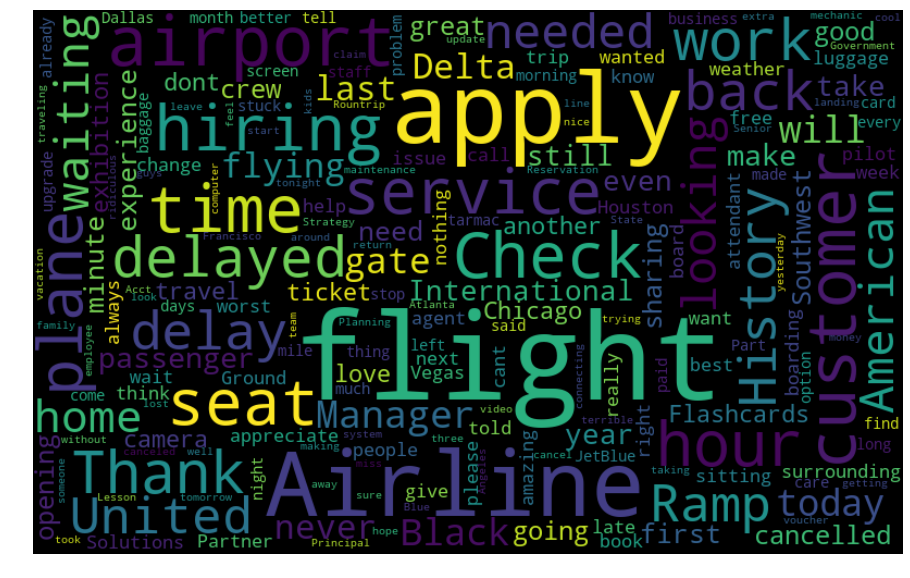

In [84]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in Tweets['tidy_text']])
wordcloud = WordCloud(collocations=False, width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

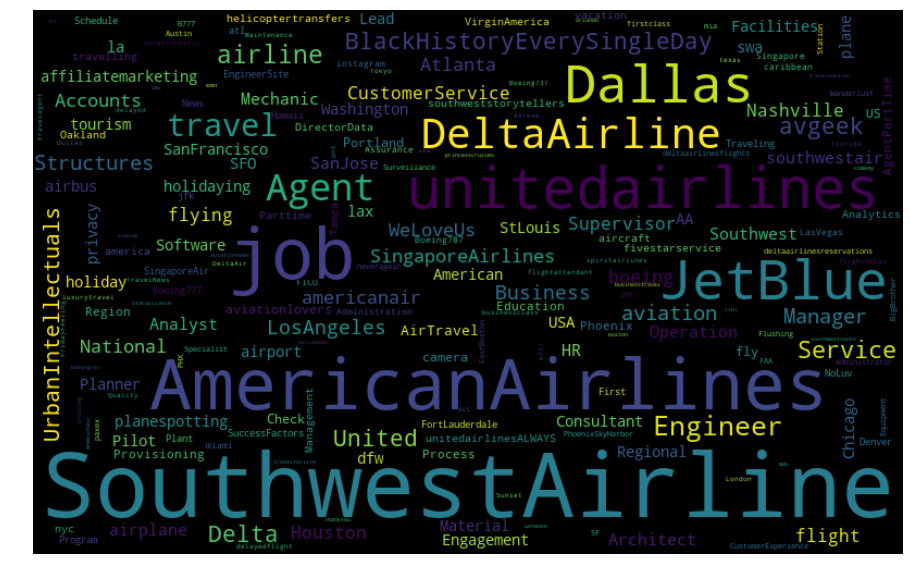

In [85]:
all_hashtags = ' '.join([text for text in Tweets['hashtags'].str.replace(',', '')])
wordcloud = WordCloud(collocations=False, width=800, height=500, random_state=21, max_font_size=110).generate(all_hashtags)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [79]:
Tweets['search_keyword'].value_counts()

SouthwestAirlines    836
AmericanAirlines     464
JetBlue              275
UnitedAirlines       272
DeltaAirlines        131
VirginAmerica          9
Name: search_keyword, dtype: int64

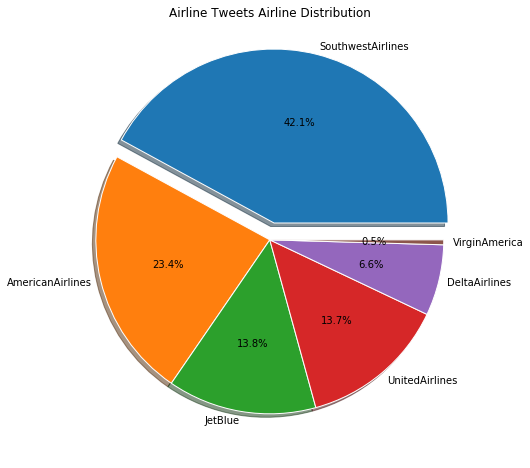

In [53]:
airline_counts = Tweets['search_keyword'].value_counts()
labels = [0]*len(airline_counts)
for i in range(len(airline_counts)): labels[i] = airline_counts.index[i]
explode = (0.1, 0, 0, 0, 0, 0)   

fig1 = plt.figure(figsize=[8, 8])
ax1 = fig1.add_subplot(111)

pie_wedge_collection = ax1.pie(airline_counts, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
                              shadow=True);

for pie_wedge in pie_wedge_collection[0]: pie_wedge.set_edgecolor('white')

ax1.set_title("Airline Tweets Airline Distribution");
plt.show()

In [87]:
format_str = '%Y-%m-%d'
for index, row in Tweets.iterrows():
    date_str = Tweets['creation_date'][index]
    Tweets.loc[index, 'weekday'] = datetime.datetime.strptime(date_str, format_str).today().weekday()